Before cleaning: (127, 6)
After cleaning: (109, 6)

===== a_median Model =====
Train R²: 0.8593584302325573
Test R² : -0.047619047619047006


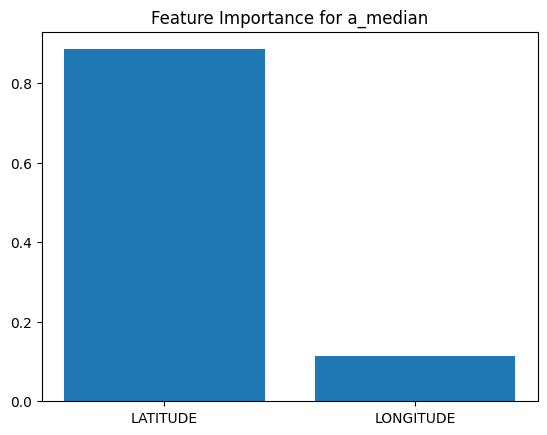


===== b_median Model =====
Train R²: 0.8597778509376233
Test R² : -0.27638052584070105


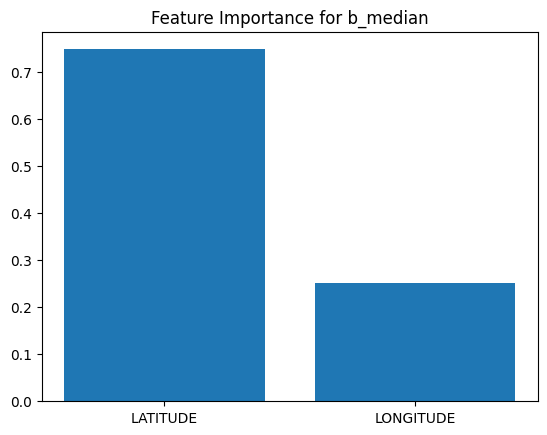


Cross-validation R²:
a_median: -5.3249529865473014e+125
b_median: -29.060119756281807


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load Data
# ------------------------------
coords = pd.read_csv("Data_Information.csv")         # has GAGE_ID, LATITUDE, LONGITUDE
params = pd.read_csv("catchment_ab_summary.csv")     # has GAGE_ID, a_median, b_median

# Merge on GAGE_ID
df = pd.merge(coords, params, on="GAGE_ID")

print("Before cleaning:", df.shape)
# Drop rows with missing values
df = df.dropna(subset=["a_median", "b_median"])
print("After cleaning:", df.shape)

# ------------------------------
# 2. Features and Targets
# ------------------------------
X = df[["LATITUDE", "LONGITUDE"]]   # predictors

# ------------------------------
# 3. Random Forest for a_median
# ------------------------------
y_a = df["a_median"]

Xa_train, Xa_test, ya_train, ya_test = train_test_split(X, y_a, test_size=0.2, random_state=42)

rf_a = RandomForestRegressor(n_estimators=200, random_state=42)
rf_a.fit(Xa_train, ya_train)

print("\n===== a_median Model =====")
print("Train R²:", rf_a.score(Xa_train, ya_train))
print("Test R² :", rf_a.score(Xa_test, ya_test))

# Feature importance plot
plt.bar(X.columns, rf_a.feature_importances_)
plt.title("Feature Importance for a_median")
plt.show()

# ------------------------------
# 4. Random Forest for b_median
# ------------------------------
y_b = df["b_median"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X, y_b, test_size=0.2, random_state=42)

rf_b = RandomForestRegressor(n_estimators=200, random_state=42)
rf_b.fit(Xb_train, yb_train)

print("\n===== b_median Model =====")
print("Train R²:", rf_b.score(Xb_train, yb_train))
print("Test R² :", rf_b.score(Xb_test, yb_test))

# Feature importance plot
plt.bar(X.columns, rf_b.feature_importances_)
plt.title("Feature Importance for b_median")
plt.show()

# ------------------------------
# 5. Cross-validation
# ------------------------------
cv_a = cross_val_score(rf_a, X, y_a, cv=5).mean()
cv_b = cross_val_score(rf_b, X, y_b, cv=5).mean()

print("\nCross-validation R²:")
print("a_median:", cv_a)
print("b_median:", cv_b)
